In [6]:
import tensorflow as tf
import os
from tensorflow.keras.utils import normalize
import numpy as np
from patchify import patchify, unpatchify
import  cv2
from PIL import Image
from matplotlib import pyplot as plt


In [7]:
def get_image_source_list(source):
   l=os.listdir(source)
   return l
def return_slised_image(large_image):
  patches = patchify(large_image, (512, 512), step=512)  
  return patches

In [8]:
def get_train_images(patches,patches_target):
  x_train=[]
  y_train=[]
  for i in range(15):
    for j in range(15):
      x_train.append(patches[i][j])
      y_train.append(patches_target[i][j])
  return x_train,y_train
      

In [9]:
def get_train_test_data(l_target,l_data,source,target_source):
    x_train=[]
    y_train=[]
    x_test=[]
    y_test=[]
    for x in range(len(l_target)):
        x_image=cv2.imread(os.path.join(source,l_data[x]),0)
        y_image=cv2.imread(os.path.join(target_source,l_target[x]),0)
        x_patches=return_slised_image(x_image)
        y_patches=return_slised_image(y_image)
        l,s=get_train_images(x_patches,y_patches)
        if x<19:
            x_train=x_train+l
            y_train=y_train+s
        else:
            x_test=x_test+l
            y_test=y_test+s
    x_train=np.array(x_train)
    x_train=x_train/255.0
    y_train=np.array(y_train)
    y_train=y_train/255.0
    x_test=np.array(x_test)
    x_test=x_test/255.0
    y_test=np.array(y_test)
    y_test=y_test/255.0
    
    return x_train,x_test,y_train,y_test

In [10]:
target_source=r"C:\Users\youss\jupyter\tp ML\target_data" #put the path for thr file of your target
l_target=get_image_source_list(target_source)
print(l_target)

['thm_dir_N-30_000_-30_0_0_30_2_32_km_segrng.png', 'thm_dir_N-30_030_-30_0_30_60_2_32_km_segrng.png', 'thm_dir_N-30_060_-30_0_60_90_2_32_km_segrng.png', 'thm_dir_N-30_090_-30_0_90_120_2_32_km_segrng.png', 'thm_dir_N-30_120_-30_0_120_150_2_32_km_segrng.png', 'thm_dir_N-30_150_-30_0_150_180_2_32_km_segrng.png', 'thm_dir_N-30_180_-30_0_-180_-150_2_32_km_segrng.png', 'thm_dir_N-30_210_-30_0_-150_-120_2_32_km_segrng.png', 'thm_dir_N-30_240_-30_0_-120_-90_2_32_km_segrng.png', 'thm_dir_N-30_270_-30_0_-90_-60_2_32_km_segrng.png', 'thm_dir_N-30_300_-30_0_-60_-30_2_32_km_segrng.png', 'thm_dir_N-30_330_-30_0_-30_0_2_32_km_segrng.png', 'thm_dir_N00_000_0_30_0_30_2_32_km_segrng.png', 'thm_dir_N00_030_0_30_30_60_2_32_km_segrng.png', 'thm_dir_N00_060_0_30_60_90_2_32_km_segrng.png', 'thm_dir_N00_090_0_30_90_120_2_32_km_segrng.png', 'thm_dir_N00_120_0_30_120_150_2_32_km_segrng.png', 'thm_dir_N00_150_0_30_150_180_2_32_km_segrng.png', 'thm_dir_N00_180_0_30_-180_-150_2_32_km_segrng.png', 'thm_dir_N00_210_

In [11]:
print(sorted(l_target))
l_target=sorted(l_target)

['thm_dir_N-30_000_-30_0_0_30_2_32_km_segrng.png', 'thm_dir_N-30_030_-30_0_30_60_2_32_km_segrng.png', 'thm_dir_N-30_060_-30_0_60_90_2_32_km_segrng.png', 'thm_dir_N-30_090_-30_0_90_120_2_32_km_segrng.png', 'thm_dir_N-30_120_-30_0_120_150_2_32_km_segrng.png', 'thm_dir_N-30_150_-30_0_150_180_2_32_km_segrng.png', 'thm_dir_N-30_180_-30_0_-180_-150_2_32_km_segrng.png', 'thm_dir_N-30_210_-30_0_-150_-120_2_32_km_segrng.png', 'thm_dir_N-30_240_-30_0_-120_-90_2_32_km_segrng.png', 'thm_dir_N-30_270_-30_0_-90_-60_2_32_km_segrng.png', 'thm_dir_N-30_300_-30_0_-60_-30_2_32_km_segrng.png', 'thm_dir_N-30_330_-30_0_-30_0_2_32_km_segrng.png', 'thm_dir_N00_000_0_30_0_30_2_32_km_segrng.png', 'thm_dir_N00_030_0_30_30_60_2_32_km_segrng.png', 'thm_dir_N00_060_0_30_60_90_2_32_km_segrng.png', 'thm_dir_N00_090_0_30_90_120_2_32_km_segrng.png', 'thm_dir_N00_120_0_30_120_150_2_32_km_segrng.png', 'thm_dir_N00_150_0_30_150_180_2_32_km_segrng.png', 'thm_dir_N00_180_0_30_-180_-150_2_32_km_segrng.png', 'thm_dir_N00_210_

In [12]:
print(l_target)

['thm_dir_N-30_000_-30_0_0_30_2_32_km_segrng.png', 'thm_dir_N-30_030_-30_0_30_60_2_32_km_segrng.png', 'thm_dir_N-30_060_-30_0_60_90_2_32_km_segrng.png', 'thm_dir_N-30_090_-30_0_90_120_2_32_km_segrng.png', 'thm_dir_N-30_120_-30_0_120_150_2_32_km_segrng.png', 'thm_dir_N-30_150_-30_0_150_180_2_32_km_segrng.png', 'thm_dir_N-30_180_-30_0_-180_-150_2_32_km_segrng.png', 'thm_dir_N-30_210_-30_0_-150_-120_2_32_km_segrng.png', 'thm_dir_N-30_240_-30_0_-120_-90_2_32_km_segrng.png', 'thm_dir_N-30_270_-30_0_-90_-60_2_32_km_segrng.png', 'thm_dir_N-30_300_-30_0_-60_-30_2_32_km_segrng.png', 'thm_dir_N-30_330_-30_0_-30_0_2_32_km_segrng.png', 'thm_dir_N00_000_0_30_0_30_2_32_km_segrng.png', 'thm_dir_N00_030_0_30_30_60_2_32_km_segrng.png', 'thm_dir_N00_060_0_30_60_90_2_32_km_segrng.png', 'thm_dir_N00_090_0_30_90_120_2_32_km_segrng.png', 'thm_dir_N00_120_0_30_120_150_2_32_km_segrng.png', 'thm_dir_N00_150_0_30_150_180_2_32_km_segrng.png', 'thm_dir_N00_180_0_30_-180_-150_2_32_km_segrng.png', 'thm_dir_N00_210_

In [13]:
source=r"C:\Users\youss\jupyter\tp ML\preprossed_data"  # put the preprocessing path 
l_data=get_image_source_list(source)
print(l_data)

['thm_dir_N-30_000.pnggood_image.png', 'thm_dir_N-30_030.pnggood_image.png', 'thm_dir_N-30_060.pnggood_image.png', 'thm_dir_N-30_090.pnggood_image.png', 'thm_dir_N-30_120.pnggood_image.png', 'thm_dir_N-30_150.pnggood_image.png', 'thm_dir_N-30_180.pnggood_image.png', 'thm_dir_N-30_210.pnggood_image.png', 'thm_dir_N-30_240.pnggood_image.png', 'thm_dir_N-30_270.pnggood_image.png', 'thm_dir_N-30_300.pnggood_image.png', 'thm_dir_N-30_330.pnggood_image.png', 'thm_dir_N00_000.pnggood_image.png', 'thm_dir_N00_030.pnggood_image.png', 'thm_dir_N00_060.pnggood_image.png', 'thm_dir_N00_090.pnggood_image.png', 'thm_dir_N00_120.pnggood_image.png', 'thm_dir_N00_150.pnggood_image.png', 'thm_dir_N00_180.pnggood_image.png', 'thm_dir_N00_210.pnggood_image.png', 'thm_dir_N00_240.pnggood_image.png', 'thm_dir_N00_270.pnggood_image.png', 'thm_dir_N00_300.pnggood_image.png', 'thm_dir_N00_330.pnggood_image.png']


In [14]:
x_train,x_test,y_train,y_test = get_train_test_data(l_target,l_data,source,target_source)

In [15]:
l_target=None
l_data=None
source=None
target_source=None
# hadhom just bich irata7 iram imta3kim chwaya 

In [16]:


from keras.models import Model, load_model
from keras.layers import Dense, Input, BatchNormalization, Dropout
from keras.layers import Add
from keras.layers.convolutional import Conv2D, MaxPooling2D, AveragePooling2D, UpSampling2D
from keras import backend as K
from keras import optimizers
from keras import metrics
import datetime
import glob
import random
from pandas import DataFrame

import numpy as np
import matplotlib.pyplot as plt

In [17]:
IMG_WIDTH = 512
IMG_HEIGHT = 512
IMG_CHANNELS = 1

In [18]:
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

In [19]:
checkpoint = ModelCheckpoint(r"C:\Users\youss\jupyter\tp ML\model3.h5",
                             monitor="val_loss",
                             mode="min",
                             save_best_only=True,
                             verbose=1)

# EarlyStopping to find best model with a large number of epochs
earlystop = EarlyStopping(monitor='val_loss',
                          restore_best_weights=True,
                          patience=10,  # number of epochs with no improvement after which training will be stopped
                          verbose=1)

callbacks = [earlystop, checkpoint]


In [20]:
# model = new_unet()

In [21]:
def default_unet(): 
     z1 = Input(shape=(512,512,1))

     #Encoder path
     z2 = Conv2D(16, 3, padding='same', activation='relu')(z1)
     p2 = AveragePooling2D(pool_size=2)(z2)

     z3 = Conv2D(24, 3, padding='same', activation='relu')(p2)
     p3 = AveragePooling2D(pool_size=2)(z3)

     z4 = Conv2D(32, 3, padding='same', activation='relu')(p3)
     d4 = Dropout(0.2)(z4)
     p4 = AveragePooling2D(pool_size=2)(d4)

     z5 = Conv2D(48, 3, padding='same', activation='relu')(p4)
     d5 = Dropout(0.2)(z5)
     p5 = AveragePooling2D(pool_size=2)(d5)

     z6 = Conv2D(64, 3, padding='same', activation='relu')(p5)
     d6 = Dropout(0.2)(z6)
     p6 = AveragePooling2D(pool_size=2)(d6)

     z7 = Conv2D(96, 3, padding='same', activation='relu')(p6)
     d7 = Dropout(0.2)(z7)
     p7 = AveragePooling2D(pool_size=2)(d7)

     z8 = Conv2D(128, 3, padding='same', activation='relu')(p7)
     d8 = Dropout(0.2)(z8)
     p8 = AveragePooling2D(pool_size=2)(d8)

     z9 = Conv2D(128, 3, padding='same', activation='relu')(p8)
     d9 = Dropout(0.2)(z9)

     #Decoder path

     u9 = UpSampling2D(size=2)(d9)
     q9 = Conv2D(128, 3, padding='same', activation='relu')(u9)
     d9b = Dropout(0.2)(q9)
     a9 = Add()([d9b,z8])

     u8 = UpSampling2D(size=2)(a9)
     q8 = Conv2D(96, 3, padding='same', activation='relu')(u8)
     d8b = Dropout(0.2)(q8)
     a8 = Add()([d8b,z7])

     u7 = UpSampling2D(size=2)(a8)
     q7 = Conv2D(64, 3, padding='same', activation='relu')(u7)
     d7b = Dropout(0.2)(q7)
     a7 = Add()([d7b,z6])

     u6 = UpSampling2D(size=2)(a7)
     q6 = Conv2D(48, 3, padding='same', activation='relu')(u6)
     d6b = Dropout(0.2)(q6)
     a6 = Add()([d6b,z5])

     u5 = UpSampling2D(size=2)(a6)
     q5 = Conv2D(32, 3, padding='same', activation='relu')(u5)
     d5b = Dropout(0.2)(q5)
     a5 = Add()([d5b,z4])

     u4 = UpSampling2D(size=2)(a5)
     q4 = Conv2D(24, 3, padding='same', activation='relu')(u4)
     a4 = Add()([q4,z3])

     u3 = UpSampling2D(size=2)(a4)
     q3 = Conv2D(16, 3, padding='same', activation='relu')(u3)
     a3 = Add()([q3,z2])

     z_final = Conv2D(1, 3, padding='same', activation='sigmoid')(a3)

     #z8 activation = sigmoid or softmax

     model=Model(inputs = z1, outputs = z_final)
     model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
     return model

In [22]:
modell=default_unet()


In [23]:
resultss = modell.fit(x_train, y_train, validation_split=0.2, batch_size=16, epochs=100, callbacks=callbacks)

Epoch 1/100
214/214 [==============================] - ETA: 0s - loss: 0.3553 - accuracy: 0.8908
Epoch 1: val_loss improved from inf to 0.24062, saving model to C:\Users\youss\jupyter\tp ML\model3.h5
214/214 [==============================] - 1184s 5s/step - loss: 0.3553 - accuracy: 0.8908 - val_loss: 0.2406 - val_accuracy: 0.9397
Epoch 2/100
214/214 [==============================] - ETA: 0s - loss: 0.2940 - accuracy: 0.8967
Epoch 2: val_loss improved from 0.24062 to 0.16764, saving model to C:\Users\youss\jupyter\tp ML\model3.h5
214/214 [==============================] - 1173s 5s/step - loss: 0.2940 - accuracy: 0.8967 - val_loss: 0.1676 - val_accuracy: 0.9605
Epoch 3/100
214/214 [==============================] - ETA: 0s - loss: 0.2403 - accuracy: 0.9179
Epoch 3: val_loss improved from 0.16764 to 0.12730, saving model to C:\Users\youss\jupyter\tp ML\model3.h5
214/214 [==============================] - 1179s 6s/step - loss: 0.2403 - accuracy: 0.9179 - val_loss: 0.1273 - val_accuracy: 

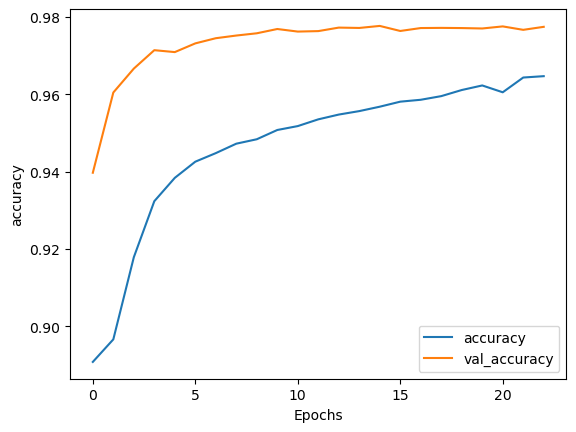

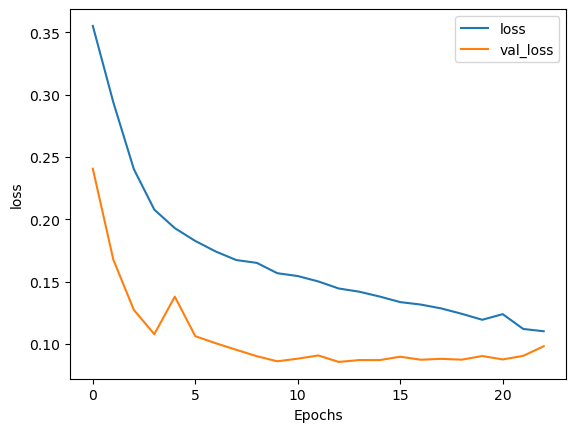

In [24]:
import matplotlib.pyplot as plt

# Plot utility
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

# Plot the accuracy and results 
plot_graphs(resultss, "accuracy")
plot_graphs(resultss, "loss")

In [25]:
from tensorflow import keras

In [26]:
model = keras.models.load_model('./model3.h5')

In [27]:
testing_pred = model.predict(x_test)

36/36 [==============================] - 77s 2s/step


In [39]:
testing = (testing_pred > 0.6).astype(np.uint8)

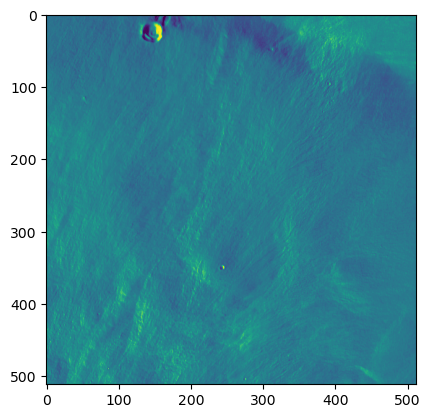

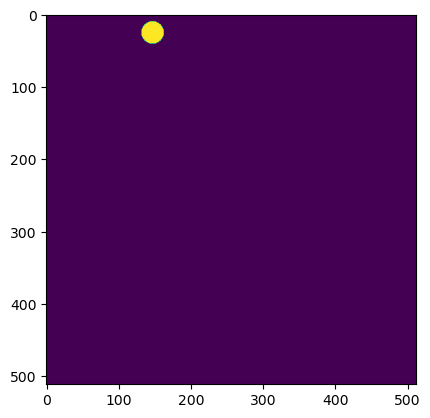

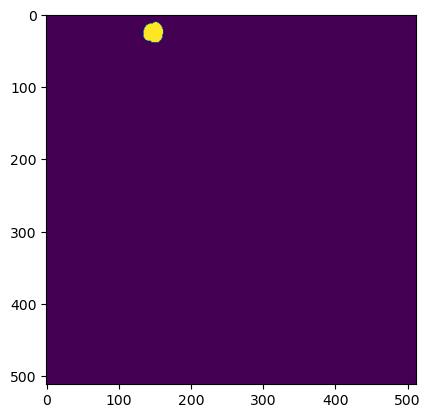

In [41]:
ix = random.randint(0, len(x_test))
# ix =936
plt.imshow(x_test[ix])
plt.show()
plt.imshow(np.squeeze(y_test[ix]))
plt.show()
plt.imshow(np.squeeze(testing[ix]))
plt.show()

In [34]:
print(ix)

936
